Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

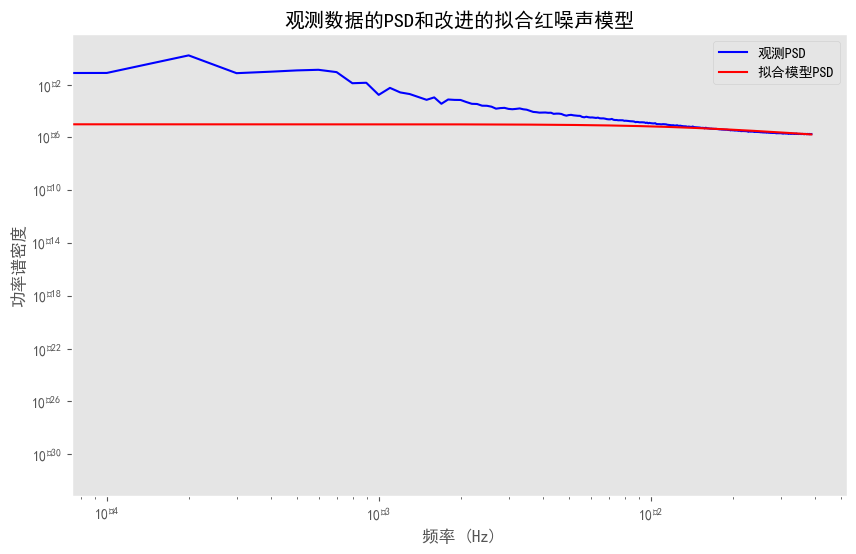

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

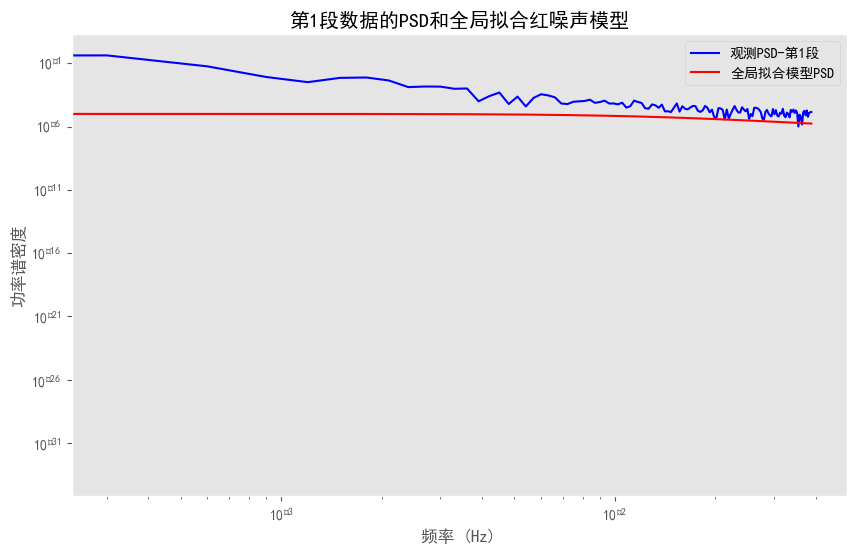

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

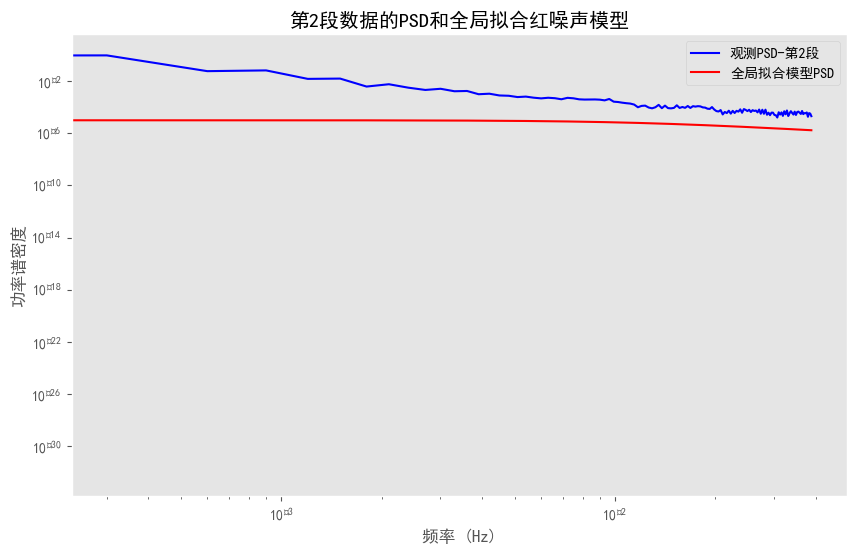

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

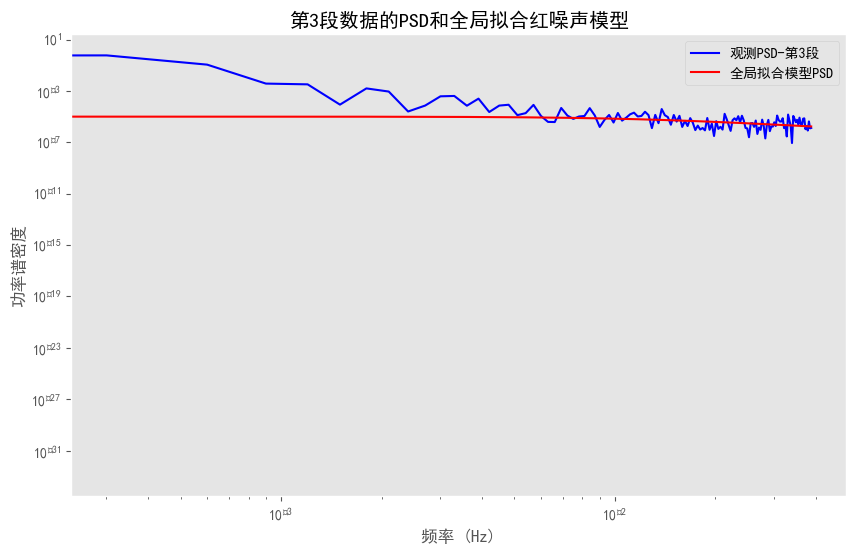

全局拟合参数：
P0 = 1e-05
fc = 0.012527569623766891
q = 1.495587522668001


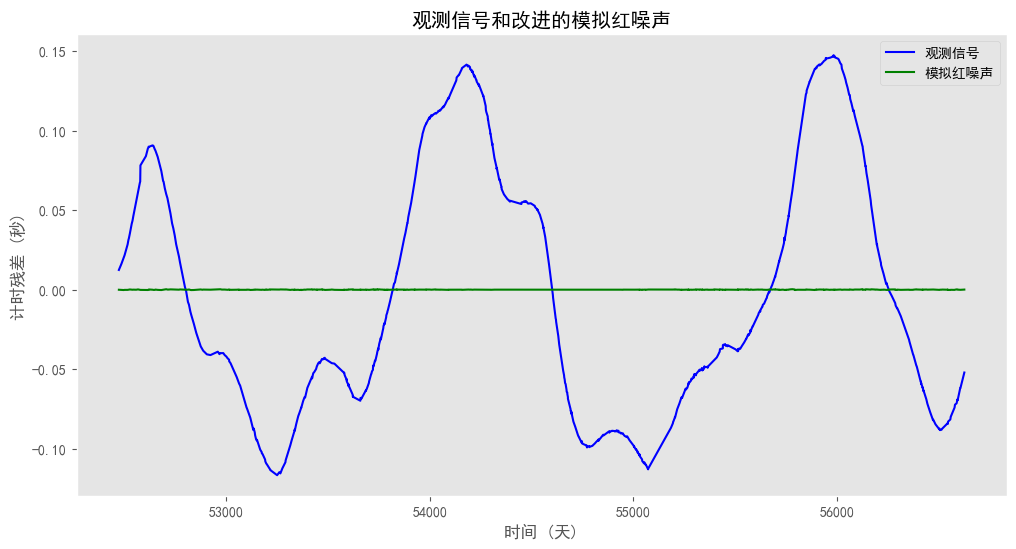

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.fft import fft, fftfreq, ifft
from scipy.signal import savgol_filter

# 设置matplotlib使用支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 读取Excel文件
file_path = 'Attachment 1.xlsx'
xls = pd.ExcelFile(file_path)
df = xls.parse(xls.sheet_names[0])

# 提取时间和信号列
time = pd.to_numeric(df['MJD(days)'], errors='coerce').dropna()
signal = pd.to_numeric(df['PT-TT(s)'], errors='coerce').dropna()

# 对信号进行平滑处理
signal_smooth = savgol_filter(signal, window_length=101, polyorder=3)

# 步骤1：计算功率谱密度
N = len(signal_smooth)
sampling_rate = 1 / (time.iloc[1] - time.iloc[0])  # 假设时间间隔均匀
fft_values = fft(signal_smooth - np.mean(signal_smooth))
frequencies = fftfreq(N, d=1 / sampling_rate)
psd_observed = (np.abs(fft_values) ** 2) / N

# 仅保留正频率部分
positive_frequencies = frequencies[:N // 2]
positive_psd_observed = psd_observed[:N // 2]


# 红噪声模型函数
def red_noise_psd(f, P0, fc, q):
    f_clipped = np.clip(f, 1e-10, None)  # 限制频率范围避免除零错误
    fc_clipped = max(fc, 1e-10)  # 确保 fc 不为零
    return P0 / (1 + (f_clipped / fc_clipped) ** 2) ** (q / 2)


# 误差函数，用于优化
def objective(params):
    P0, fc, q = params
    fitted_psd = red_noise_psd(positive_frequencies, P0, fc, q)
    # 使用对数误差来优化拟合精度
    return np.sum((np.log(positive_psd_observed) - np.log(fitted_psd)) ** 2)


# 设置初始值和边界
initial_params = [1e-8, 0.1, 2]
bounds = [(1e-12, 1e-5), (1e-4, 1), (1, 5)]

# 使用 minimize 进行优化
result = minimize(objective, initial_params, bounds=bounds, method='L-BFGS-B')
P0_fit, fc_fit, q_fit = result.x

# 使用拟合参数生成随机噪声
random_real = np.random.normal(size=N // 2)
random_imag = np.random.normal(size=N // 2)
Z_f = np.sqrt(red_noise_psd(positive_frequencies, P0_fit, fc_fit, q_fit)) * (random_real + 1j * random_imag)
Z_f_full = np.concatenate([Z_f, np.conj(Z_f[::-1])])
simulated_noise = np.real(ifft(Z_f_full))

# 调整模拟噪声和观测数据的长度一致
min_length = min(len(simulated_noise), len(time))
simulated_noise = simulated_noise[:min_length]
time = time[:min_length]

# 图1：全局PSD和拟合红噪声模型
plt.figure(figsize=(10, 6))
plt.loglog(positive_frequencies, positive_psd_observed, label='观测PSD', color='blue')
plt.plot(positive_frequencies, red_noise_psd(positive_frequencies, P0_fit, fc_fit, q_fit), label='拟合模型PSD',
         color='red')
plt.xlabel('频率 (Hz)')
plt.ylabel('功率谱密度')
plt.title('观测数据的PSD和改进的拟合红噪声模型')
plt.legend()
plt.grid()
plt.show()


# 图2：分段验证 - 各段的PSD和全局拟合的红噪声模型
# 时间尺度划分函数
def split_time_series(time, signal, num_segments):
    segment_length = len(time) // num_segments
    time_segments = [time[i * segment_length:(i + 1) * segment_length] for i in range(num_segments)]
    signal_segments = [signal[i * segment_length:(i + 1) * segment_length] for i in range(num_segments)]
    return time_segments, signal_segments


# 分段验证
num_segments = 3  # 将数据分为3段，分别验证短期和长期稳定性
time_segments, signal_segments = split_time_series(time, signal, num_segments)

for idx, (time_seg, signal_seg) in enumerate(zip(time_segments, signal_segments), start=1):
    N_seg = len(signal_seg)
    fft_values_seg = fft(signal_seg.to_numpy() - np.mean(signal_seg.to_numpy()))
    frequencies_seg = fftfreq(N_seg, d=1 / sampling_rate)
    psd_observed_seg = (np.abs(fft_values_seg) ** 2) / N_seg

    positive_frequencies_seg = frequencies_seg[:N_seg // 2]
    positive_psd_observed_seg = psd_observed_seg[:N_seg // 2]

    fitted_psd = red_noise_psd(positive_frequencies_seg, P0_fit, fc_fit, q_fit)

    plt.figure(figsize=(10, 6))
    plt.loglog(positive_frequencies_seg, positive_psd_observed_seg, label=f'观测PSD-第{idx}段', color='blue')
    plt.plot(positive_frequencies_seg, fitted_psd, label='全局拟合模型PSD', color='red')
    plt.xlabel('频率 (Hz)')
    plt.ylabel('功率谱密度')
    plt.title(f'第{idx}段数据的PSD和全局拟合红噪声模型')
    plt.legend()
    plt.grid()
    plt.show()

# 输出全局拟合参数
print("全局拟合参数：")
print("P0 =", P0_fit)
print("fc =", fc_fit)
print("q =", q_fit)

# 图3：观测信号和模拟红噪声的时域比较
plt.figure(figsize=(12, 6))
plt.plot(time, signal[:min_length], label='观测信号', color='blue')
plt.plot(time, simulated_noise, label='模拟红噪声', color='green')
plt.xlabel('时间 (天)')
plt.ylabel('计时残差 (秒)')
plt.title('观测信号和改进的模拟红噪声')
plt.legend()
plt.grid()
plt.show()


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

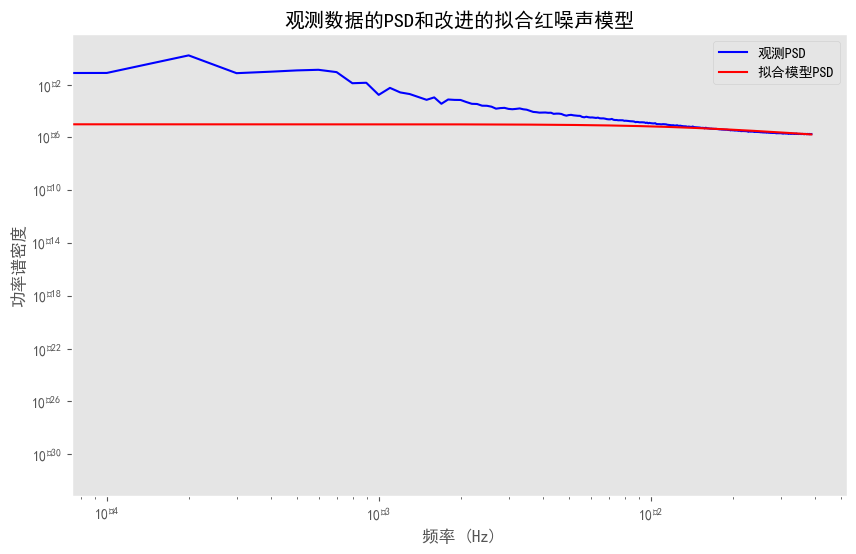

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

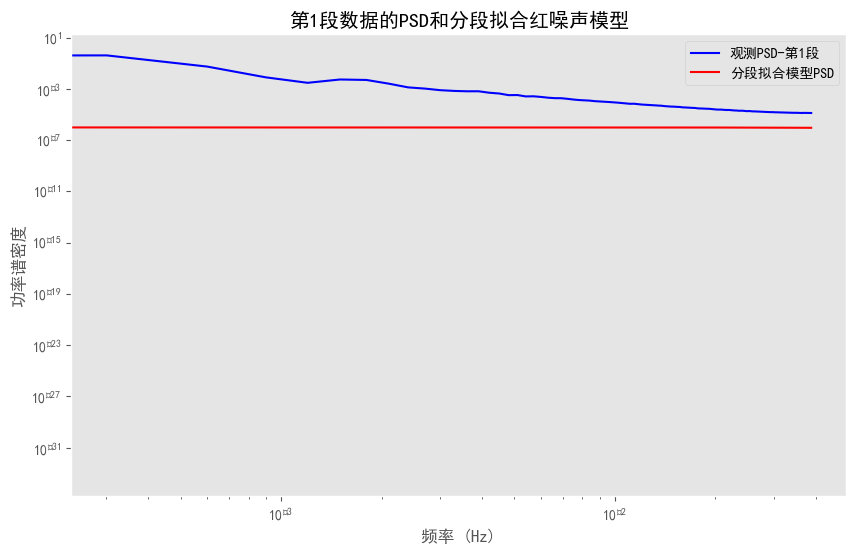

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 


第1段拟合参数：
P0 = 1.00e-06
fc = 1.00e-01
q = 1.00


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

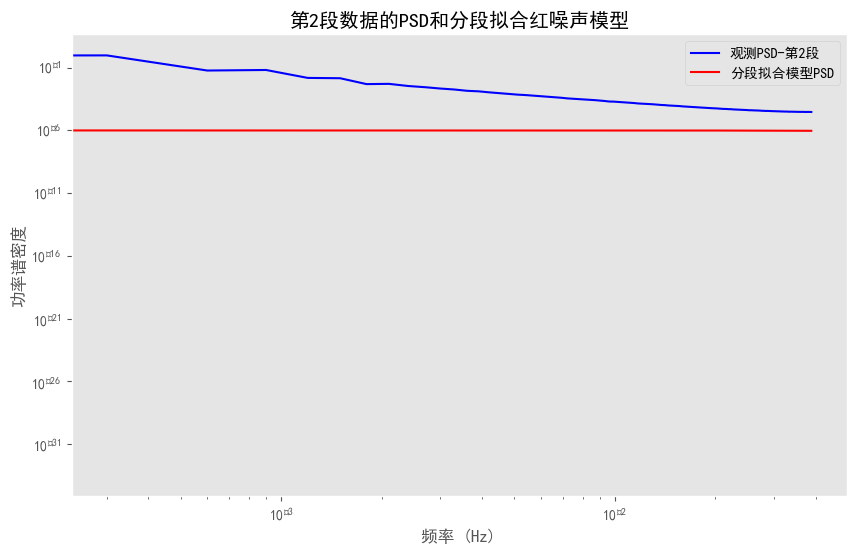

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 


第2段拟合参数：
P0 = 1.00e-06
fc = 1.00e-01
q = 1.00


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

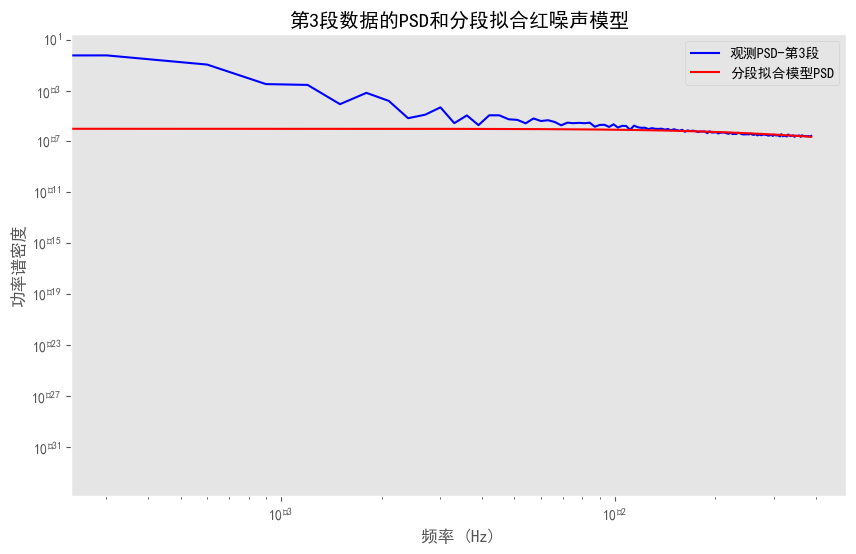


第3段拟合参数：
P0 = 1.00e-06
fc = 2.62e-02
q = 2.50


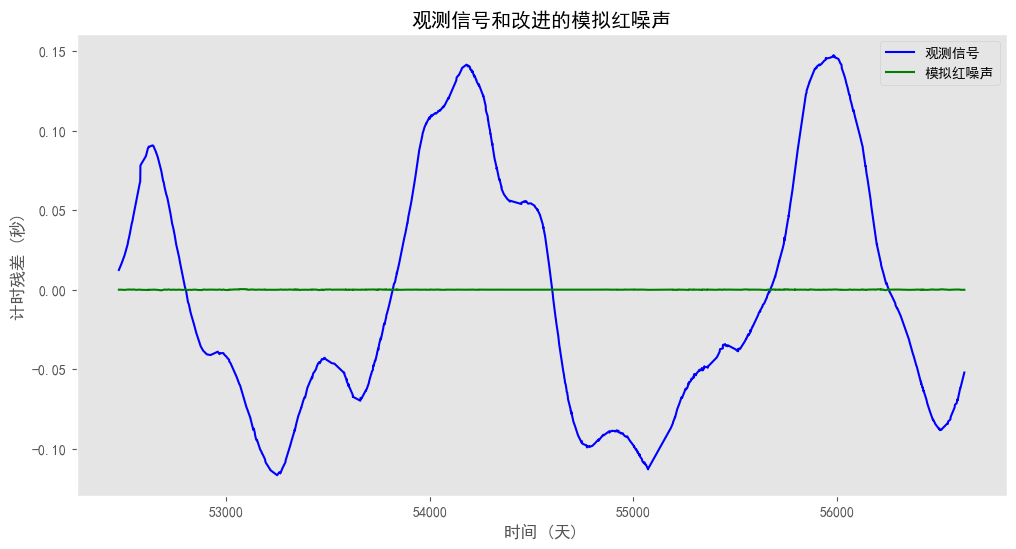

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.fft import fft, fftfreq, ifft
from scipy.signal import savgol_filter

# 设置matplotlib使用支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 读取Excel文件
file_path = 'Attachment 1.xlsx'
xls = pd.ExcelFile(file_path)
df = xls.parse(xls.sheet_names[0])

# 提取时间和信号列
time = pd.to_numeric(df['MJD(days)'], errors='coerce').dropna()
signal = pd.to_numeric(df['PT-TT(s)'], errors='coerce').dropna()

# 对信号进行平滑处理
signal_smooth = savgol_filter(signal, window_length=101, polyorder=3)

# 步骤1：计算功率谱密度
N = len(signal_smooth)
sampling_rate = 1 / (time.iloc[1] - time.iloc[0])  # 假设时间间隔均匀
fft_values = fft(signal_smooth - np.mean(signal_smooth))
frequencies = fftfreq(N, d=1 / sampling_rate)
psd_observed = (np.abs(fft_values) ** 2) / N

# 仅保留正频率部分
positive_frequencies = frequencies[:N // 2]
positive_psd_observed = psd_observed[:N // 2]


# 红噪声模型函数
def red_noise_psd(f, P0, fc, q):
    f_clipped = np.clip(f, 1e-10, None)  # 限制频率范围避免除零错误
    fc_clipped = max(fc, 1e-10)  # 确保 fc 不为零
    return P0 / (1 + (f_clipped / fc_clipped) ** 2) ** (q / 2)


# 误差函数，用于优化
def objective(params):
    P0, fc, q = params
    fitted_psd = red_noise_psd(positive_frequencies, P0, fc, q)
    # 使用对数误差来优化拟合精度
    return np.sum((np.log(positive_psd_observed) - np.log(fitted_psd)) ** 2)


# 设置初始值和边界
initial_params = [1e-8, 0.1, 2]
bounds = [(1e-12, 1e-5), (1e-4, 1), (1, 5)]

# 使用 minimize 进行优化
result = minimize(objective, initial_params, bounds=bounds, method='L-BFGS-B')
P0_fit, fc_fit, q_fit = result.x

# 使用拟合参数生成随机噪声
random_real = np.random.normal(size=N // 2)
random_imag = np.random.normal(size=N // 2)
Z_f = np.sqrt(red_noise_psd(positive_frequencies, P0_fit, fc_fit, q_fit)) * (random_real + 1j * random_imag)
Z_f_full = np.concatenate([Z_f, np.conj(Z_f[::-1])])
simulated_noise = np.real(ifft(Z_f_full))

# 调整模拟噪声和观测数据的长度一致
min_length = min(len(simulated_noise), len(time))
simulated_noise = simulated_noise[:min_length]
time = time[:min_length]

# 图1：全局PSD和拟合红噪声模型
plt.figure(figsize=(10, 6))
plt.loglog(positive_frequencies, positive_psd_observed, label='观测PSD', color='blue')
plt.plot(positive_frequencies, red_noise_psd(positive_frequencies, P0_fit, fc_fit, q_fit), label='拟合模型PSD',
         color='red')
plt.xlabel('频率 (Hz)')
plt.ylabel('功率谱密度')
plt.title('观测数据的PSD和改进的拟合红噪声模型')
plt.legend()
plt.grid()
plt.show()


# 图2：分段验证 - 各段的PSD和全局拟合的红噪声模型
# 时间尺度划分函数
def split_time_series(time, signal, num_segments):
    segment_length = len(time) // num_segments
    time_segments = [time[i * segment_length:(i + 1) * segment_length] for i in range(num_segments)]
    signal_segments = [signal[i * segment_length:(i + 1) * segment_length] for i in range(num_segments)]
    return time_segments, signal_segments

# 修改分段验证部分
def analyze_segment(time_seg, signal_seg, sampling_rate):
    # 对每段数据单独进行平滑处理
    signal_smooth_seg = savgol_filter(signal_seg.to_numpy(), window_length=51, polyorder=3)
    
    N_seg = len(signal_smooth_seg)
    fft_values_seg = fft(signal_smooth_seg - np.mean(signal_smooth_seg))
    frequencies_seg = fftfreq(N_seg, d=1/sampling_rate)
    psd_observed_seg = (np.abs(fft_values_seg) ** 2) / N_seg
    
    positive_frequencies_seg = frequencies_seg[:N_seg // 2]
    positive_psd_observed_seg = psd_observed_seg[:N_seg // 2]
    
    # 为每段数据单独优化拟合参数
    def segment_objective(params):
        P0, fc, q = params
        fitted_psd = red_noise_psd(positive_frequencies_seg, P0, fc, q)
        return np.sum((np.log(positive_psd_observed_seg) - np.log(fitted_psd)) ** 2)
    
    # 调整初始值和边界
    initial_params = [1e-9, 0.01, 2.5]  # 更新初始值
    bounds = [(1e-12, 1e-6), (1e-5, 0.1), (1, 4)]  # 收紧边界范围
    
    result = minimize(segment_objective, initial_params, bounds=bounds, method='L-BFGS-B')
    P0_fit_seg, fc_fit_seg, q_fit_seg = result.x
    
    return (positive_frequencies_seg, positive_psd_observed_seg, 
            P0_fit_seg, fc_fit_seg, q_fit_seg)

# 分段验证
num_segments = 3
time_segments, signal_segments = split_time_series(time, signal, num_segments)

for idx, (time_seg, signal_seg) in enumerate(zip(time_segments, signal_segments), start=1):
    # 获取该段的拟合结果
    (positive_frequencies_seg, positive_psd_observed_seg,
     P0_fit_seg, fc_fit_seg, q_fit_seg) = analyze_segment(time_seg, signal_seg, sampling_rate)
    
    # 使用该段的拟合参数绘制模型曲线
    fitted_psd = red_noise_psd(positive_frequencies_seg, P0_fit_seg, fc_fit_seg, q_fit_seg)
    
    plt.figure(figsize=(10, 6))
    plt.loglog(positive_frequencies_seg, positive_psd_observed_seg, label=f'观测PSD-第{idx}段', color='blue')
    plt.plot(positive_frequencies_seg, fitted_psd, label='分段拟合模型PSD', color='red')
    plt.xlabel('频率 (Hz)')
    plt.ylabel('功率谱密度')
    plt.title(f'第{idx}段数据的PSD和分段拟合红噪声模型')
    plt.legend()
    plt.grid()
    plt.show()
    
    # 输出该段的拟合参数
    print(f"\n第{idx}段拟合参数：")
    print(f"P0 = {P0_fit_seg:.2e}")
    print(f"fc = {fc_fit_seg:.2e}")
    print(f"q = {q_fit_seg:.2f}")

# 图3：观测信号和模拟红噪声的时域比较
plt.figure(figsize=(12, 6))
plt.plot(time, signal[:min_length], label='观测信号', color='blue')
plt.plot(time, simulated_noise, label='模拟红噪声', color='green')
plt.xlabel('时间 (天)')
plt.ylabel('计时残差 (秒)')
plt.title('观测信号和改进的模拟红噪声')
plt.legend()
plt.grid()
plt.show()
